# Structural Deep Network Embedding

## Structural Deep Network Embedding (SDNE)

### 🔍 Introduction

**Structural Deep Network Embedding (SDNE)** is a graph embedding technique that leverages deep neural networks (specifically deep autoencoders) to learn low-dimensional representations of nodes in a graph. The goal is to embed nodes such that the structural properties of the graph are preserved, capturing both:

- **First-order proximity**: which reflects the direct connections between nodes (local pairwise similarity).  
- **Second-order proximity**: which captures the similarity of nodes' neighborhood structures (i.e., nodes with similar neighbors should have similar embeddings).

Unlike shallow embedding methods like DeepWalk or LINE, which capture linear relationships or random-walk-based similarities, SDNE uses nonlinear transformations, making it more powerful in modeling complex graph structures.

---

### 🧠 Intuition

SDNE tries to ensure two key properties in the embedding space:

1. **First-order proximity**: If two nodes $i$ and $j$ are connected directly in the graph, their embeddings $y_i$ and $y_j$ should be close (small distance).  
2. **Second-order proximity**: Nodes that share similar neighborhoods should have embeddings that are close to each other, even if they are not directly connected.

To achieve this, SDNE uses:

- A **deep autoencoder** trained to reconstruct each node's neighborhood vector (row of adjacency matrix) — preserving second-order proximity by forcing embeddings to encode neighborhood structure.  
- A **supervised penalty term** on pairs of directly connected nodes, encouraging embeddings to be close — preserving first-order proximity.

---

### 🧮 Mathematical Formulation

Consider a graph with:

- $n$ nodes,  
- Adjacency matrix $A \in \mathbb{R}^{n \times n}$, where $A_{ij} = w_{ij} > 0$ if there is an edge between nodes $i$ and $j$, otherwise zero,  
- $x_i \in \mathbb{R}^n$: the $i$-th row of $A$, representing the neighborhood vector of node $i$.

---

#### 1. Autoencoder for Second-Order Proximity

- **Encoder**: maps input neighborhood $x_i$ to latent embedding $y_i$:

  $$
  y_i = f(x_i; \theta)
  $$

  where $f$ is a nonlinear function parameterized by weights $\theta$ (e.g., a multi-layer perceptron).

- **Decoder**: reconstructs neighborhood vector from embedding:

  $$
  \hat{x}_i = g(y_i; \theta')
  $$

  where $g$ is also a nonlinear function (e.g., MLP), parameterized by $\theta'$.

- **Reconstruction loss**:

  Since adjacency is sparse, to avoid penalizing zero entries too strongly (which dominate), we use a mask $b_i$ that is 1 where $x_i$ is non-zero, and 0 elsewhere:

  $$
  \mathcal{L}_{2nd} = \sum_{i=1}^n \left\| (x_i - \hat{x}_i) \odot b_i \right\|_2^2 = \sum_{i=1}^n \sum_{j=1}^n b_{ij} (x_{ij} - \hat{x}_{ij})^2
  $$

  Here, $\odot$ is element-wise multiplication, and $b_{ij} = 1$ if $x_{ij} \neq 0$ else 0.

  This loss encourages the autoencoder to learn embeddings that capture the **second-order proximity** — the similarity of neighborhood structures.

---

#### 2. First-Order Proximity Loss

To preserve first-order proximity, SDNE introduces a supervised loss penalizing embeddings of connected nodes being far apart:

$$
\mathcal{L}_{1st} = \sum_{(i,j) \in E} w_{ij} \| y_i - y_j \|_2^2 = \sum_{(i,j) \in E} w_{ij} (y_i - y_j)^\top (y_i - y_j)
$$

- Here, $E$ is the set of edges.  
- $w_{ij}$ is the weight of the edge between nodes $i$ and $j$.  
- Minimizing this term forces embeddings of adjacent nodes to be close, preserving **local structural proximity**.

---

#### 3. Regularization

To avoid overfitting and encourage smoothness in weights, a regularization term is added, typically:

$$
\mathcal{L}_{reg} = \frac{1}{2} \sum_l \| W^{(l)} \|_F^2
$$

where $W^{(l)}$ are the weight matrices of the layers in encoder and decoder, and $\| \cdot \|_F$ is the Frobenius norm.

---

#### 4. Total Loss

Combining all terms, the total SDNE loss is:

$$
\boxed{
\mathcal{L}_{SDNE} = \mathcal{L}_{2nd} + \alpha \mathcal{L}_{1st} + \beta \mathcal{L}_{reg}
}
$$

- $\alpha > 0$ controls the importance of first-order proximity.  
- $\beta > 0$ controls the strength of regularization.

By minimizing $\mathcal{L}_{SDNE}$, SDNE learns embeddings that capture both local edges and global neighborhood structure.

---

### ⚙️ Key Characteristics

| Feature                     | Description                                    |
|-----------------------------|------------------------------------------------|
| Architecture                | Deep autoencoder (MLP layers)                   |
| Graph Type                 | Static, undirected                              |
| Input                      | Adjacency matrix rows (neighborhood vectors)   |
| Captures First-Order Proximity | Yes, supervised loss term                     |
| Captures Second-Order Proximity | Yes, via autoencoder reconstruction          |
| Handles Node Attributes?    | No, only graph structure                         |
| Non-linearity              | Yes, nonlinear activations like ReLU, sigmoid   |
| Typical Uses               | Node classification, clustering, visualization |

---

### 📦 Implementation Note

- SDNE can be implemented in PyTorch using standard `nn.Module` autoencoder.  
- Training involves forward pass computing embeddings and reconstruction, then computing both $\mathcal{L}_{2nd}$ and $\mathcal{L}_{1st}$ losses.  
- Optimization updates weights to minimize combined loss.

---

Would you like me to provide a full PyTorch code example implementing SDNE based on this formulation?


Using device: cpu
Graph Info: 34 nodes, 78 edges
Model parameters: 367,266

Starting training...
Epoch    0 | Total: 1.160990 | Recon: 0.305255 | First: 78.887749 | Reg: 156.158493
Epoch   50 | Total: 0.124236 | Recon: 0.089163 | First: 0.963569 | Reg: 157.994019
Epoch  100 | Total: 0.108300 | Recon: 0.073624 | First: 0.769130 | Reg: 157.829636
Epoch  150 | Total: 0.101011 | Recon: 0.062510 | First: 1.195354 | Reg: 157.765762
Epoch  200 | Total: 0.086125 | Recon: 0.045591 | First: 1.300315 | Reg: 157.621246
Epoch  250 | Total: 0.093973 | Recon: 0.054795 | First: 1.075346 | Reg: 157.475769
Early stopping at epoch 261


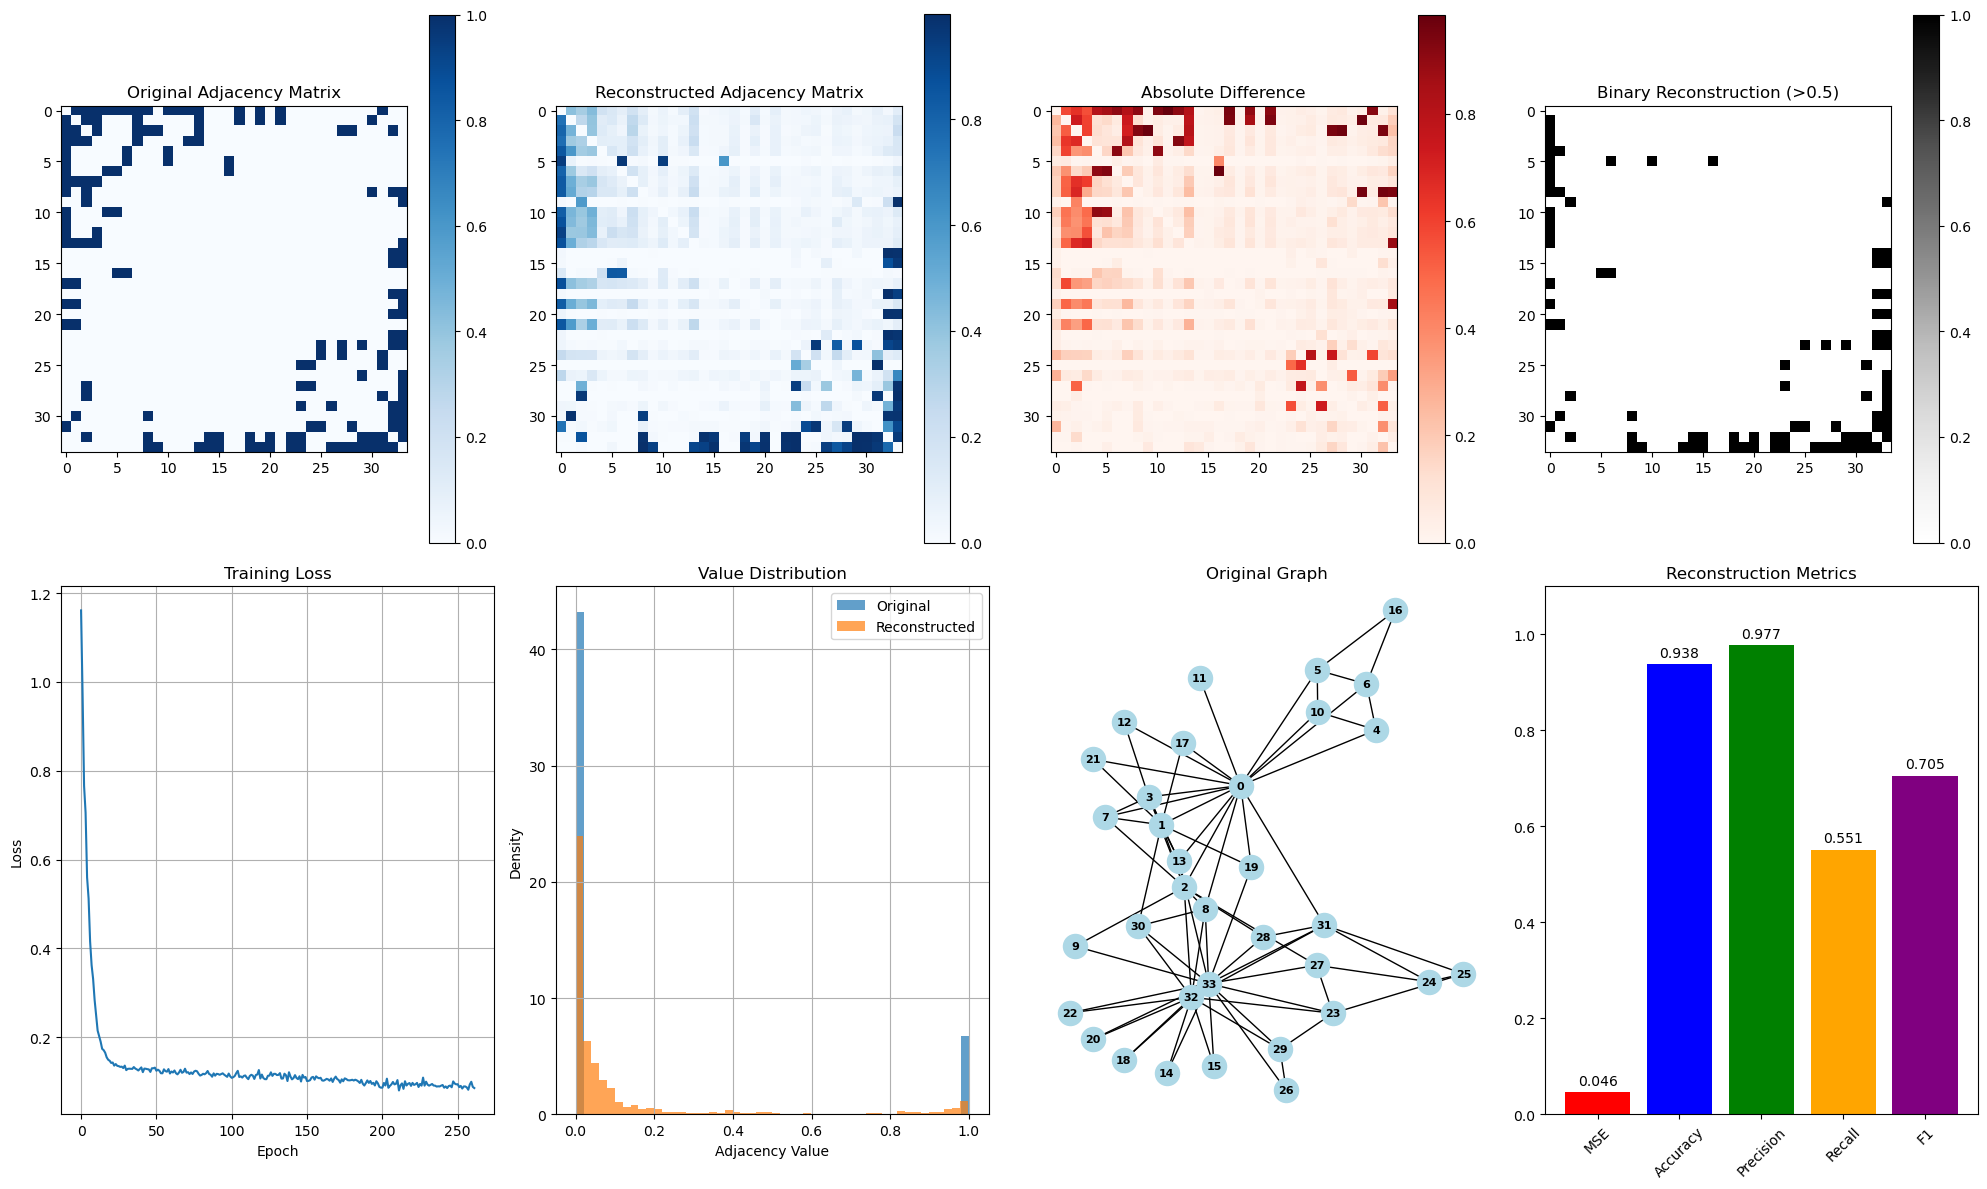


RECONSTRUCTION EVALUATION RESULTS
Mean Squared Error: 0.045908
Binary Accuracy: 0.9377
Precision: 0.9773
Recall: 0.5513
F1-Score: 0.7049
Original Edges: 156
Reconstructed Edges: 88
Correctly Reconstructed Edges: 86


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

class ImprovedSDNE(nn.Module):
    def __init__(self, input_dim, hidden_layers, alpha=1e-2, beta=1e-3, dropout=0.3):
        super(ImprovedSDNE, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.input_dim = input_dim
        
        # Encoder with dropout and batch normalization
        encoder_layers = []
        in_dim = input_dim
        for i, h in enumerate(hidden_layers):
            encoder_layers.append(nn.Linear(in_dim, h))
            if i < len(hidden_layers) - 1:  # No BatchNorm on the last layer
                encoder_layers.append(nn.BatchNorm1d(h))
            encoder_layers.append(nn.ReLU())
            encoder_layers.append(nn.Dropout(dropout))
            in_dim = h
        self.encoder = nn.Sequential(*encoder_layers)
        
        # Decoder (symmetric architecture)
        decoder_layers = []
        reversed_layers = list(reversed(hidden_layers[:-1])) + [input_dim]
        for i, h in enumerate(reversed_layers):
            decoder_layers.append(nn.Linear(in_dim, h))
            if i < len(reversed_layers) - 1:  # No activation on output layer
                if h != input_dim:  # No BatchNorm on output layer
                    decoder_layers.append(nn.BatchNorm1d(h))
                decoder_layers.append(nn.ReLU())
                decoder_layers.append(nn.Dropout(dropout))
            in_dim = h
        
        # Add sigmoid for final output to ensure values in [0,1]
        decoder_layers.append(nn.Sigmoid())
        self.decoder = nn.Sequential(*decoder_layers)
        
        # Initialize weights
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            nn.init.zeros_(module.bias)
    
    def forward(self, x):
        # Encode
        y = self.encoder(x)
        # Decode
        x_hat = self.decoder(y)
        return y, x_hat
    
    def compute_loss(self, x, x_hat, y, adj):
        # 1. Reconstruction loss (L2)
        recon_loss = F.mse_loss(x_hat, x, reduction='mean')
        
        # 2. First-order proximity loss (more efficient computation)
        first_order_loss = 0.0
        adj_indices = torch.nonzero(adj > 0, as_tuple=False)
        
        if adj_indices.size(0) > 0:
            i_indices = adj_indices[:, 0]
            j_indices = adj_indices[:, 1]
            
            # Compute pairwise distances for connected nodes
            y_i = y[i_indices]
            y_j = y[j_indices]
            distances = torch.sum((y_i - y_j) ** 2, dim=1)
            
            # Weight by adjacency values
            weights = adj[i_indices, j_indices]
            first_order_loss = torch.mean(weights * distances)
        
        # 3. Regularization loss
        reg_loss = 0
        for param in self.parameters():
            reg_loss += torch.norm(param, p=2)
        
        # 4. Sparsity loss to encourage sparse reconstruction
        sparsity_loss = torch.mean(x_hat) * 0.1
        
        total_loss = recon_loss + self.alpha * first_order_loss + self.beta * reg_loss + sparsity_loss
        
        return {
            'total_loss': total_loss,
            'recon_loss': recon_loss,
            'first_order_loss': first_order_loss,
            'reg_loss': reg_loss,
            'sparsity_loss': sparsity_loss
        }

def prepare_data(G, use_normalization=False):
    """Prepare adjacency matrix with proper preprocessing"""
    # Get adjacency matrix
    A = nx.to_numpy_array(G, dtype=np.float32)
    
    # Add self-loops for better node representation
    A_with_self_loops = A + np.eye(A.shape[0])
    
    if use_normalization:
        # Use symmetric normalization instead of L1
        D = np.diag(np.sum(A_with_self_loops, axis=1))
        D_inv_sqrt = np.diag(1.0 / np.sqrt(np.sum(A_with_self_loops, axis=1) + 1e-8))
        A_normalized = D_inv_sqrt @ A_with_self_loops @ D_inv_sqrt
    else:
        A_normalized = A_with_self_loops
    
    return A, A_normalized

def train_model(model, A_input, A_target, device, epochs=500, lr=0.001):
    """Train the SDNE model with improved training loop"""
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                           factor=0.8, patience=20, verbose=True)
    
    A_input_tensor = torch.tensor(A_input, dtype=torch.float32).to(device)
    A_target_tensor = torch.tensor(A_target, dtype=torch.float32).to(device)
    
    losses = []
    best_loss = float('inf')
    patience_counter = 0
    max_patience = 50
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        y, A_recon = model(A_input_tensor)
        
        # Compute loss
        loss_dict = model.compute_loss(A_target_tensor, A_recon, y, A_target_tensor)
        total_loss = loss_dict['total_loss']
        
        # Backward pass
        total_loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        scheduler.step(total_loss)
        
        losses.append(total_loss.item())
        
        # Early stopping
        if total_loss.item() < best_loss:
            best_loss = total_loss.item()
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= max_patience:
            print(f"Early stopping at epoch {epoch}")
            break
        
        if epoch % 50 == 0:
            print(f"Epoch {epoch:4d} | Total: {total_loss.item():.6f} | "
                  f"Recon: {loss_dict['recon_loss'].item():.6f} | "
                  f"First: {loss_dict['first_order_loss'].item():.6f} | "
                  f"Reg: {loss_dict['reg_loss'].item():.6f}")
    
    return losses, A_recon

def evaluate_reconstruction(A_original, A_reconstructed, threshold=0.5):
    """Evaluate reconstruction quality"""
    A_orig = A_original.cpu().detach().numpy() if torch.is_tensor(A_original) else A_original
    A_recon = A_reconstructed.cpu().detach().numpy() if torch.is_tensor(A_reconstructed) else A_reconstructed
    
    # Remove self-loops for evaluation if they exist
    np.fill_diagonal(A_orig, 0)
    np.fill_diagonal(A_recon, 0)
    
    # MSE
    mse = mean_squared_error(A_orig.flatten(), A_recon.flatten())
    
    # Binary accuracy
    A_orig_binary = (A_orig > 0).astype(int)
    A_recon_binary = (A_recon > threshold).astype(int)
    accuracy = accuracy_score(A_orig_binary.flatten(), A_recon_binary.flatten())
    
    # Edge-specific metrics
    edges_orig = np.sum(A_orig_binary)
    edges_recon = np.sum(A_recon_binary)
    edges_correct = np.sum(A_orig_binary * A_recon_binary)
    
    precision = edges_correct / edges_recon if edges_recon > 0 else 0
    recall = edges_correct / edges_orig if edges_orig > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'mse': mse,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'edges_original': edges_orig,
        'edges_reconstructed': edges_recon,
        'edges_correct': edges_correct
    }

def plot_comprehensive_results(A_orig, A_recon, losses, metrics, G):
    """Comprehensive visualization of results"""
    fig = plt.figure(figsize=(20, 12))
    
    # Convert tensors to numpy if needed
    if torch.is_tensor(A_orig):
        A_orig = A_orig.cpu().detach().numpy()
    if torch.is_tensor(A_recon):
        A_recon = A_recon.cpu().detach().numpy()
    
    # Remove self-loops for visualization
    A_orig_vis = A_orig.copy()
    A_recon_vis = A_recon.copy()
    np.fill_diagonal(A_orig_vis, 0)
    np.fill_diagonal(A_recon_vis, 0)
    
    # 1. Original adjacency matrix
    plt.subplot(2, 4, 1)
    plt.imshow(A_orig_vis, cmap="Blues", interpolation='nearest')
    plt.title("Original Adjacency Matrix")
    plt.colorbar()
    
    # 2. Reconstructed adjacency matrix
    plt.subplot(2, 4, 2)
    plt.imshow(A_recon_vis, cmap="Blues", interpolation='nearest')
    plt.title("Reconstructed Adjacency Matrix")
    plt.colorbar()
    
    # 3. Difference matrix
    plt.subplot(2, 4, 3)
    diff_matrix = np.abs(A_orig_vis - A_recon_vis)
    plt.imshow(diff_matrix, cmap="Reds", interpolation='nearest')
    plt.title("Absolute Difference")
    plt.colorbar()
    
    # 4. Binary reconstruction (thresholded)
    plt.subplot(2, 4, 4)
    A_recon_binary = (A_recon_vis > 0.5).astype(float)
    plt.imshow(A_recon_binary, cmap="Greys", interpolation='nearest')
    plt.title("Binary Reconstruction (>0.5)")
    plt.colorbar()
    
    # 5. Training loss
    plt.subplot(2, 4, 5)
    plt.plot(losses)
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    
    # 6. Value distribution comparison
    plt.subplot(2, 4, 6)
    plt.hist(A_orig_vis.flatten(), bins=50, alpha=0.7, label='Original', density=True)
    plt.hist(A_recon_vis.flatten(), bins=50, alpha=0.7, label='Reconstructed', density=True)
    plt.title("Value Distribution")
    plt.xlabel("Adjacency Value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    
    # 7. Original graph visualization
    plt.subplot(2, 4, 7)
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_color='lightblue', node_size=300, 
            with_labels=True, font_size=8, font_weight='bold')
    plt.title("Original Graph")
    
    # 8. Metrics summary
    plt.subplot(2, 4, 8)
    metric_names = ['MSE', 'Accuracy', 'Precision', 'Recall', 'F1']
    metric_values = [metrics['mse'], metrics['accuracy'], 
                    metrics['precision'], metrics['recall'], metrics['f1']]
    
    bars = plt.bar(metric_names, metric_values, color=['red', 'blue', 'green', 'orange', 'purple'])
    plt.title("Reconstruction Metrics")
    plt.ylim(0, 1.1)
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, metric_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed metrics
    print("\n" + "="*50)
    print("RECONSTRUCTION EVALUATION RESULTS")
    print("="*50)
    print(f"Mean Squared Error: {metrics['mse']:.6f}")
    print(f"Binary Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1']:.4f}")
    print(f"Original Edges: {metrics['edges_original']}")
    print(f"Reconstructed Edges: {metrics['edges_reconstructed']}")
    print(f"Correctly Reconstructed Edges: {metrics['edges_correct']}")

def main():
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Load and prepare data
    G = nx.karate_club_graph()
    print(f"Graph Info: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    
    A_original, A_processed = prepare_data(G, use_normalization=True)
    
    # Initialize improved model
    model = ImprovedSDNE(
        input_dim=A_processed.shape[1], 
        hidden_layers=[512, 256, 128], 
        alpha=1e-2,  # First-order proximity weight
        beta=1e-4,   # Regularization weight
        dropout=0.2
    ).to(device)
    
    print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    
    # Train model
    print("\nStarting training...")
    losses, A_reconstructed = train_model(
        model, A_processed, A_original, device, 
        epochs=300, lr=0.001
    )
    
    # Evaluate reconstruction
    metrics = evaluate_reconstruction(A_original, A_reconstructed, threshold=0.5)
    
    # Visualize results
    plot_comprehensive_results(A_original, A_reconstructed, losses, metrics, G)

if __name__ == "__main__":
    main()